# Veri Ön İşleme - Data Preprocess

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv(r'G:\Other computers\My Laptop D14\Belgeler\CODING\Python.PROJECTS\MTM-DataMining-FlightDelay\manipulated_data\flightDelay_manipulated.csv')

df = data.copy()

**Bu aşamda, Keşifçi Veri Analizi aşamasındaki çıkarımlarımız ile, veriyi modele hazır hale getirecek işlemleri gerçekleştireceğiz.**

Keşifçi Veri Analizi safhasında, modelimizi **DelayLabel** isimli bir hedef değişkenin sınıflandırıcısı niteliğinde oluşturacağımızı planlamıştık. **DelayLabel**, Planlanan ve gerçekleşen kalkış saatleri arasındaki dakika cinsinden süreye göre üç sınıfa ayrılmış kategorik bir değişkendir. Bu kategoriler:

- **Early**, 5 dakika ve üzerindeki **planlanan zamanından erken kalkış**ları ifade eder.
- **Delay**, 5 dakika ve üzerindeki **planlanan zamanından geç kalkış**ları ifade eder.
- **On Time**, 5 dakikaya kadar olan aksaklıkları (erken-geç kalkışlar) da içine alarak **planlanan zamanında kalkış** yapan uçuşları ifade eder.

Belirlediğimiz hedef değişken ile veri setinde bulunan değişkenlerin birliktelik analizleri, Keşifçi Veri Analizi safhasında irdelenmiştir. Bu çalışma sonucunda aşağıdaki özniteliklerin doğru formata getirilip, bunlar üzerinden modelin inşaa edilmesi planlanmıştır. Önişleme basamakları **Karar Ağacı (Decision Tree Classifier)** ve **Rastgele Orman (Random Forest)** ile model inşaasına yönelik gerçekleşecektir. Bu algoritmaların seçilmesinin ana sebebi, çok sınıflı kategorik değişkenlenler ile çalışıyor olmasıdır. Boyut laneti ile karşılaşmamak adına Label Encoding kullanılacaktır. Bahsedilen algoritmalar One-Hot Encoding olmaksızın çalışabilmektedir.

#### Öznitelikler (Bağımsız Değişkenler)

**Flight_Number_Marketing_Airline**
- Düşük görülme sıklığına sahip sınıflar ayıklanmalı. 
- Veriler zaten sayısal olduğunnda Label encoding gerekmez.

**DepTimeBlk**
- Label encoding gerçekleştirilecektir.

**AirTime**
- Kullanacağımız model ölçekleme gerektirmez.

**OriginAirport**
- Düşük görülme sıklığına sahip sınıflar ayıklanmalı. 
- Label encoding gerçekleştirilecektir.

#### Hedef Değişken (Bağımlı Değişken)

**DelayLabel**
- Label encoding gerçekleştirilecektir.


In [3]:
col_selection = ['Flight_Number_Marketing_Airline', 'DepTimeBlk', 'AirTime', 'OriginAirport', 'DelayLabel']

df_model = df[col_selection]

In [4]:
df_model

,Flight_Number_Marketing_Airline,DepTimeBlk,AirTime,OriginAirport,DelayLabel
0,1582,1600-1659,93.0,ATL,On Time
1,1583,1000-1059,93.0,FLL,Early
2,1584,1100-1159,60.0,ATL,On Time
3,1584,1200-1259,49.0,JAN,Early
4,1585,0900-0959,80.0,RIC,On Time
...,...,...,...,...,...
291527,5997,1600-1659,95.0,CID,Delay
291528,5997,1600-1659,98.0,CID,On Time
291529,5997,1600-1659,98.0,CID,Delay
291530,5998,1700-1759,67.0,DFW,On Time


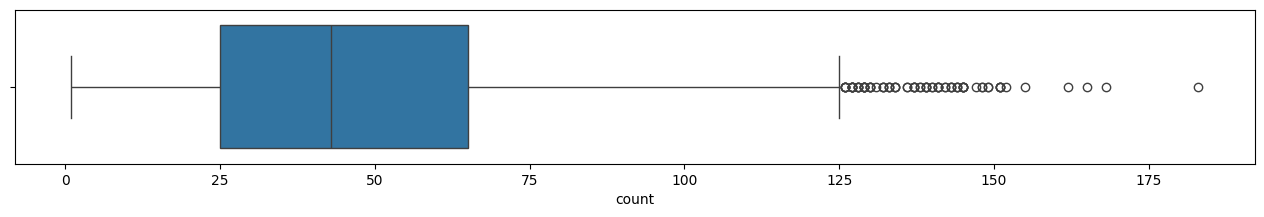

In [5]:
plt.figure(figsize=(16,2))
sns.boxplot(x = df_model['Flight_Number_Marketing_Airline'].value_counts());

Yığılma çoğunlukla 25'den sonra başlıyor. 25'den az olan kategorileri silebiliriz.

In [6]:
flight_number_counts = df_model['Flight_Number_Marketing_Airline'].value_counts()
selected_flight_numbers_list = flight_number_counts[flight_number_counts > 25].index

In [7]:
print('df_model initial shape: ', df_model.shape)

df_model initial shape:  (291532, 5)


In [8]:
df_model2 = df_model[df_model['Flight_Number_Marketing_Airline'].isin(selected_flight_numbers_list)]

print('df_model shape after flight number col eliminiated: ', df_model2.shape)

df_model shape after flight number col eliminiated:  (273212, 5)


In [9]:
df_model2.reset_index(drop=True, inplace=True)

In [10]:
df_model2

,Flight_Number_Marketing_Airline,DepTimeBlk,AirTime,OriginAirport,DelayLabel
0,1582,1600-1659,93.0,ATL,On Time
1,1583,1000-1059,93.0,FLL,Early
2,1584,1100-1159,60.0,ATL,On Time
3,1584,1200-1259,49.0,JAN,Early
4,1586,1000-1059,178.0,MSP,Delay
...,...,...,...,...,...
273207,5986,1200-1259,158.0,BFL,Early
273208,5986,1200-1259,146.0,BFL,On Time
273209,5986,1000-1059,197.0,DFW,On Time
273210,5986,1000-1059,173.0,DFW,Delay


In [11]:
df_model2['DepTimeBlk_Encoded'] = LabelEncoder().fit_transform(df_model2['DepTimeBlk'])

df_model3 = df_model2.drop('DepTimeBlk', axis=1)

C:\Users\Anıl\AppData\Local\Temp\ipykernel_15308\4072082906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model2['DepTimeBlk_Encoded'] = LabelEncoder().fit_transform(df_model2['DepTimeBlk'])


In [12]:
df_model3

,Flight_Number_Marketing_Airline,AirTime,OriginAirport,DelayLabel,DepTimeBlk_Encoded
0,1582,93.0,ATL,On Time,10
1,1583,93.0,FLL,Early,4
2,1584,60.0,ATL,On Time,5
3,1584,49.0,JAN,Early,6
4,1586,178.0,MSP,Delay,4
...,...,...,...,...,...
273207,5986,158.0,BFL,Early,6
273208,5986,146.0,BFL,On Time,6
273209,5986,197.0,DFW,On Time,4
273210,5986,173.0,DFW,Delay,4


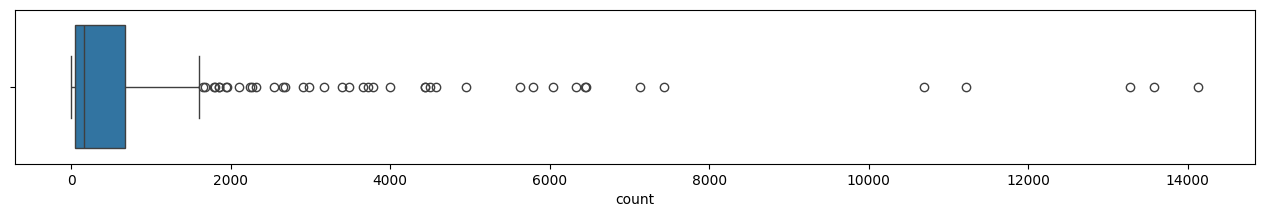

count      314.000000
mean       870.101911
std       1979.393148
min          2.000000
25%         53.000000
50%        167.500000
75%        678.250000
max      14137.000000
Name: count, dtype: float64


In [13]:
plt.figure(figsize=(16,2))
sns.boxplot(x = df_model3['OriginAirport'].value_counts());
plt.show()
print( df_model3['OriginAirport'].value_counts().describe())

In [14]:
flight_number_counts = df_model3['Flight_Number_Marketing_Airline'].value_counts()
selected_flight_numbers_list = flight_number_counts[flight_number_counts > 53].index

df_model4 = df_model3[df_model3['Flight_Number_Marketing_Airline'].isin(selected_flight_numbers_list)]

print('df_model shape after origin airport col eliminiated:', df_model4.shape)

df_model shape after origin airport col eliminiated: (190259, 5)


In [15]:
df_model5 = df_model4.reset_index(drop=True)

In [16]:
df_model5['OriginAirport_Encoded'] = LabelEncoder().fit_transform(df_model5['OriginAirport'])

df_model5.drop('OriginAirport', axis=1, inplace=True)

In [17]:
df_model5['Target'] = LabelEncoder().fit_transform(df_model5['DelayLabel'])

In [18]:
df_model5.drop('DelayLabel', axis=1, inplace=True)

Decision Tree ve Random Forest için Modelimiz hazırlandı!

In [19]:
df_model5

,Flight_Number_Marketing_Airline,AirTime,DepTimeBlk_Encoded,OriginAirport_Encoded,Target
0,1582,93.0,10,15,2
1,1583,93.0,4,100,1
2,1586,178.0,4,196,0
3,1587,55.0,8,15,0
4,1587,67.0,10,231,2
...,...,...,...,...,...
190254,5951,118.0,4,228,2
190255,5951,107.0,4,228,1
190256,5951,103.0,4,228,0
190257,5951,102.0,4,228,0


In [20]:
path = r'G:\Other computers\My Laptop D14\Belgeler\CODING\Python.PROJECTS\MTM-DataMining-FlightDelay\manipulated_data\flightDelay_preprocessed_for_DC.csv'

df_model5.to_csv(path, index=False)

------

# UNSUPERVISED

In [174]:
df.select_dtypes(object).head()

,DepTimeBlk,Merged by Marketing_Airline_Network,Merged by Operating_Airline,Merged by CRSArrTime,Merged by Distance,DelayLabel,TaxiOutLabel,ElapsedErrorLabel,AirTimeLabel,OriginAirport,DestAirport
0,1600-1659,DL / DL / 19790 / DL / N545US,DL / 19790 / DL,1821 / 1800-1859,581.0 / 3,On Time,15>x<20,Took Shorter than Planned,"('Medium Flight',)",ATL,FLL
1,1000-1059,DL / DL / 19790 / DL / N345NB,DL / 19790 / DL,1227 / 1200-1259,680.0 / 3,Early,15>x<20,Hitch (<20 min),"('Medium Flight',)",FLL,RDU
2,1100-1159,DL / DL / 19790 / DL / N978AT,DL / 19790 / DL,1142 / 1100-1159,341.0 / 2,On Time,10>x<15,Hitch (<10 min),"('Medium Flight',)",ATL,JAN
3,1200-1259,DL / DL / 19790 / DL / N978AT,DL / 19790 / DL,1458 / 1400-1459,341.0 / 2,Early,10>x<15,Hitch (<20 min),"('Short Flight',)",JAN,ATL
4,0900-0959,DL / DL / 19790 / DL / N878DN,DL / 19790 / DL,1050 / 1000-1059,481.0 / 2,On Time,10>x<15,Hitch (<10 min),"('Medium Flight',)",RIC,ATL


In [175]:
df.select_dtypes(object).nunique()

DepTimeBlk                               13
Merged by Marketing_Airline_Network    3996
Merged by Operating_Airline              14
Merged by CRSArrTime                    660
Merged by Distance                     1296
DelayLabel                                3
TaxiOutLabel                              4
ElapsedErrorLabel                         4
AirTimeLabel                              3
OriginAirport                           318
DestAirport                             317
dtype: int64

Veri setinde one-hot encoding yapılması durumunda curse of dimensionality (boyut laneti) ile karşılaşılması olasıdır. Bunun önüne geçebilmek adına bir çözüm geliştirilmelidir.


Öncelikle sadece sayısal verileri üzerinden kümeleme yapalım.

In [176]:
numeric_atts = df.select_dtypes(include=[float, int])
numeric_atts = numeric_atts.iloc[:,:-4]
numeric_atts.head()

,Flight_Number_Marketing_Airline,CRSDepTime,DepTime,TaxiOut,TaxiIn,ArrTime,Cancelled,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,DivAirportLandings,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,ArrDelay
0,1582,1631,1627.0,15.0,5.0,1820.0,0.0,0.0,110.0,113.0,93.0,1.0,0,-4.0,0.0,0.0,-1.0,-4.0
1,1583,1024,1019.0,17.0,3.0,1212.0,0.0,0.0,123.0,113.0,93.0,1.0,0,-5.0,0.0,0.0,-1.0,-5.0
2,1584,1117,1113.0,14.0,4.0,1131.0,0.0,0.0,85.0,78.0,60.0,1.0,0,-4.0,0.0,0.0,-1.0,-4.0
3,1584,1237,1230.0,11.0,5.0,1435.0,0.0,0.0,81.0,65.0,49.0,1.0,0,-7.0,0.0,0.0,-1.0,-7.0
4,1585,900,857.0,13.0,8.0,1038.0,0.0,0.0,110.0,101.0,80.0,1.0,0,-3.0,0.0,0.0,-1.0,-3.0


In [177]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
columns_ = numeric_atts.columns
numeric_atts_scaled = scaler.fit_transform(numeric_atts) #etiketli veriler çıkartıldı

In [178]:
numeric_atts_df_scaled = pd.DataFrame(numeric_atts_scaled, columns = numeric_atts.columns)

In [179]:
numeric_atts_df_scaled

,Flight_Number_Marketing_Airline,CRSDepTime,DepTime,TaxiOut,TaxiIn,ArrTime,Cancelled,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,DivAirportLandings,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,ArrDelay
0,-0.817258,1.278581,1.190874,-0.241404,-0.416642,1.185754,0.0,0.0,-0.417425,-0.250867,-0.167621,0.0,-0.001852,-0.291428,-0.286081,-0.469268,-0.465896,-0.291428
1,-0.816695,-0.567731,-0.602018,-0.046715,-0.702176,-0.682987,0.0,0.0,-0.209648,-0.250867,-0.167621,0.0,-0.001852,-0.312783,-0.286081,-0.469268,-0.465896,-0.312783
2,-0.816133,-0.284853,-0.324827,-0.338748,-0.559409,-0.931948,0.0,0.0,-0.816996,-0.815845,-0.712981,0.0,-0.001852,-0.291428,-0.286081,-0.469268,-0.465896,-0.291428
3,-0.816133,0.080151,0.020187,-0.630781,-0.416642,0.002423,0.0,0.0,-0.880928,-1.025694,-0.894768,0.0,-0.001852,-0.355492,-0.286081,-0.469268,-0.465896,-0.355492
4,-0.815570,-0.944901,-1.079729,-0.436092,0.011658,-1.217791,0.0,0.0,-0.417425,-0.444574,-0.382460,0.0,-0.001852,-0.270074,-0.286081,-0.469268,-0.465896,-0.270074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291527,1.666006,1.248164,-0.032892,1.413449,5.151264,0.211427,0.0,0.0,0.237872,0.685382,-0.134569,0.0,-0.001852,25.227084,25.766334,2.130977,5.486523,25.227084
291528,1.666006,1.248164,1.184977,-0.728125,1.153793,1.213416,0.0,0.0,0.237872,-0.073303,-0.084990,0.0,-0.001852,-0.120593,-0.198583,-0.469268,-0.008018,-0.120593
291529,1.666006,1.248164,1.529990,-0.436092,3.295295,1.751294,0.0,0.0,0.237872,0.217257,-0.084990,0.0,-0.001852,1.523696,1.485746,2.130977,2.281374,1.523696
291530,1.666568,1.610126,1.518195,0.634695,-0.702176,1.468524,0.0,0.0,-0.657168,-0.557569,-0.597298,0.0,-0.001852,-0.248720,-0.286081,-0.469268,-0.465896,-0.248720


In [180]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,10))

c:\Users\Anıl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\Anıl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Anıl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Anıl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Anıl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\

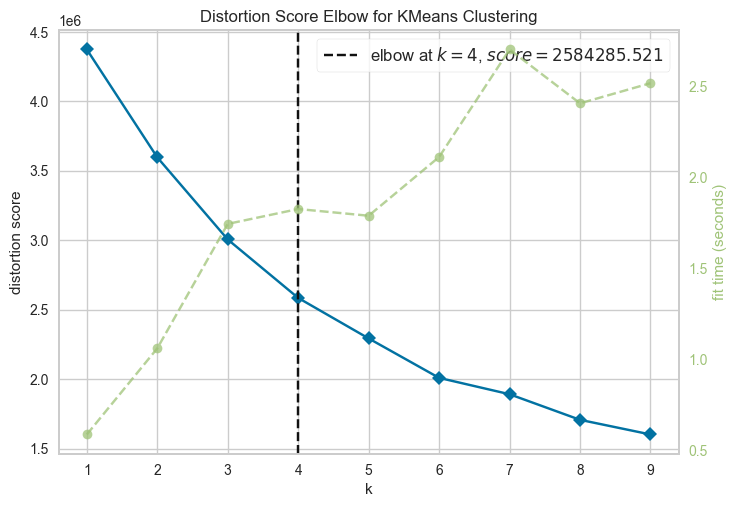

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [181]:
visualizer.fit(numeric_atts_scaled)
visualizer.poof()

Bir şey ifade etmiyor 

One-Hot Encoding yapalım ve tüm veriler ile kümeleme yapmayı deneylim.

In [182]:
df_ohe = pd.get_dummies(df.select_dtypes(include=[object]).iloc[:, :-1], prefix='Encoded')

In [183]:
df_ohe

,Encoded_0600-0659,Encoded_0700-0759,Encoded_0800-0859,Encoded_0900-0959,Encoded_1000-1059,Encoded_1100-1159,Encoded_1200-1259,Encoded_1300-1359,Encoded_1400-1459,Encoded_1500-1559,...,Encoded_TXK,Encoded_TYR,Encoded_TYS,Encoded_VCT,Encoded_VEL,Encoded_VLD,Encoded_VPS,Encoded_XNA,Encoded_XWA,Encoded_YUM
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291527,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
291528,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
291529,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
291530,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [184]:
df_ohe.dtypes

Encoded_0600-0659    bool
Encoded_0700-0759    bool
Encoded_0800-0859    bool
Encoded_0900-0959    bool
Encoded_1000-1059    bool
                     ... 
Encoded_VLD          bool
Encoded_VPS          bool
Encoded_XNA          bool
Encoded_XWA          bool
Encoded_YUM          bool
Length: 6311, dtype: object

In [185]:
df_ohe.shape

(291532, 6311)

Veri fazla büyük, fazla sınıfa sahip kategorik değişkenleri çıkaralım.

In [186]:
df.select_dtypes(object).nunique()

DepTimeBlk                               13
Merged by Marketing_Airline_Network    3996
Merged by Operating_Airline              14
Merged by CRSArrTime                    660
Merged by Distance                     1296
DelayLabel                                3
TaxiOutLabel                              4
ElapsedErrorLabel                         4
AirTimeLabel                              3
OriginAirport                           318
DestAirport                             317
dtype: int64

Merged by Marketing_Airline_Network özniteliği veriyi oldukça büyütüyor. Onu ayıklayalım.

In [187]:
df_objects_ = df.select_dtypes(include=[object]).iloc[:, [0]+list(range(2,df.select_dtypes(object).shape[1]-1))]

In [188]:
df_ohe = pd.get_dummies(df_objects_, prefix='Encoded')

memory_usage = df_ohe.memory_usage(deep=True)

# Toplam bellek kullanımını MB cinsinden görüntüle
total_memory_mb = memory_usage.sum() / (1024 ** 2)
print(f"\nToplam Bellek Kullanımı: {total_memory_mb:.2f} MB")

# Toplam bellek kullanımını GB cinsinden görüntüle
total_memory_gb = memory_usage.sum() / (1024 ** 3)
print(f"Toplam Bellek Kullanımı: {total_memory_gb:.4f} GB")


Toplam Bellek Kullanımı: 643.63 MB
Toplam Bellek Kullanımı: 0.6285 GB


In [189]:
df_ohe_ = df_ohe.astype(int)

memory_usage = df_ohe_.memory_usage(deep=True)

# Toplam bellek kullanımını MB cinsinden görüntüle
total_memory_mb = memory_usage.sum() / (1024 ** 2)
print(f"\nToplam Bellek Kullanımı: {total_memory_mb:.2f} MB")

# Toplam bellek kullanımını GB cinsinden görüntüle
total_memory_gb = memory_usage.sum() / (1024 ** 3)
print(f"Toplam Bellek Kullanımı: {total_memory_gb:.4f} GB")


Toplam Bellek Kullanımı: 2574.53 MB
Toplam Bellek Kullanımı: 2.5142 GB


In [190]:
del df_ohe_ #RAM'de yer kaplamamlı

In [191]:
array_encoded_scaled = np.concatenate([df_ohe.values, numeric_atts_scaled], axis = 1)

In [192]:
array_encoded_scaled.shape

(291532, 2333)

In [193]:
array_encoded_scaled.shape[0]/2

145766.0

In [194]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import warnings

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,8))

#ignore warnings
warnings.filterwarnings("ignore", category=FutureWarning)

visualizer.fit(array_encoded_scaled[:int(array_encoded_scaled.shape[0]/50), :])
visualizer.poof()

Etiketli verilerimizi üç grupta sınıflandırmıştık. K-means ile de öyle görünmektedir ki, gözetimsiz olarak da veri seti üç sınıfta kümelenebilmektedir. (En optimal k değeri 3 görünmektedir.) Peki gözetimsiz olarak ayrışan bu 3 grup, etiketli sınıflandırma verilerimiz ile ne kadar tutarlı?

In [ ]:
# KMeans modeli oluştur
simple_array_encoded_scaled = array_encoded_scaled[:int(array_encoded_scaled.shape[0]/50), :]

kmeans = KMeans(n_clusters=3)
kmeans.fit(simple_array_encoded_scaled)

# Her bir gözlemin hangi kümeleme kümesine ait olduğunu görüntüle
unsupervised_labels = kmeans.labels_

In [ ]:
unsupervised_labels[:10]

array([2, 1, 1, 2, 1, 0, 2, 2, 1, 2])

In [ ]:
supervised_labels = df.DelayLabel

In [ ]:
pd.Series(supervised_labels)

0         Almost on time
1         Almost on time
2         Almost on time
3                  Early
4         Almost on time
               ...      
291527             Delay
291528    Almost on time
291529             Delay
291530    Almost on time
291531             Delay
Name: DelayLabel, Length: 291532, dtype: object

In [ ]:
supervised_labels.shape

(291532,)

In [ ]:
len_labels = int(supervised_labels.shape[0]/50)

In [ ]:
supervised_labels.iloc[:len_labels].shape

(5830,)

In [ ]:
unsupervised_labels = pd.Series(unsupervised_labels)

In [ ]:
df_comparation = pd.concat([supervised_labels.iloc[:len_labels], unsupervised_labels], axis=1)

In [ ]:
df_comparation

,DelayLabel,0
0,Almost on time,2
1,Almost on time,1
2,Almost on time,1
3,Early,2
4,Almost on time,1
...,...,...
5825,Almost on time,1
5826,Almost on time,0
5827,Almost on time,2
5828,Almost on time,1


In [ ]:
df_comparation.value_counts()

DelayLabel      0
Almost on time  2    1319
                1    1242
                0     758
Delay           2     722
                1     465
Early           1     449
Delay           0     356
Early           2     353
                0     166
Name: count, dtype: int64

Gözetimsiz etiketler ile gözetimli sınıflarımız çok da örtüşüyor gibi görünmüyor.

In [ ]:
numeric_atts_df_scaled

,Flight_Number_Marketing_Airline,CRSDepTime,DepTime,TaxiOut,TaxiIn,ArrTime,Cancelled,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,DivAirportLandings
0,-0.817258,1.278581,1.190874,-0.241404,-0.416642,1.185754,0.0,0.0,-0.417425,-0.250867,-0.167621,0.0,-0.001852
1,-0.816695,-0.567731,-0.602018,-0.046715,-0.702176,-0.682987,0.0,0.0,-0.209648,-0.250867,-0.167621,0.0,-0.001852
2,-0.816133,-0.284853,-0.324827,-0.338748,-0.559409,-0.931948,0.0,0.0,-0.816996,-0.815845,-0.712981,0.0,-0.001852
3,-0.816133,0.080151,0.020187,-0.630781,-0.416642,0.002423,0.0,0.0,-0.880928,-1.025694,-0.894768,0.0,-0.001852
4,-0.815570,-0.944901,-1.079729,-0.436092,0.011658,-1.217791,0.0,0.0,-0.417425,-0.444574,-0.382460,0.0,-0.001852
...,...,...,...,...,...,...,...,...,...,...,...,...,...
291527,1.666006,1.248164,-0.032892,1.413449,5.151264,0.211427,0.0,0.0,0.237872,0.685382,-0.134569,0.0,-0.001852
291528,1.666006,1.248164,1.184977,-0.728125,1.153793,1.213416,0.0,0.0,0.237872,-0.073303,-0.084990,0.0,-0.001852
291529,1.666006,1.248164,1.529990,-0.436092,3.295295,1.751294,0.0,0.0,0.237872,0.217257,-0.084990,0.0,-0.001852
291530,1.666568,1.610126,1.518195,0.634695,-0.702176,1.468524,0.0,0.0,-0.657168,-0.557569,-0.597298,0.0,-0.001852


In [ ]:
numeric_atts.to_csv(r'G:\Other computers\My Laptop D14\Belgeler\CODING\Python.PROJECTS\MTM-DataMining-FlightDelay\manipulated_data\flightDelay_numeric_atts.csv', index=False)

In [ ]:
numeric_atts_df_scaled.to_csv(r'G:\Other computers\My Laptop D14\Belgeler\CODING\Python.PROJECTS\MTM-DataMining-FlightDelay\manipulated_data\flightDelay_numeric_atts_scaled.csv', index=False)

In [ ]:

df_objects_.to_csv(r'G:\Other computers\My Laptop D14\Belgeler\CODING\Python.PROJECTS\MTM-DataMining-FlightDelay\manipulated_data\flightDelay_objects.csv', index=False)

In [ ]:
df.iloc[:, [-1, -5]].to_csv(r'G:\Other computers\My Laptop D14\Belgeler\CODING\Python.PROJECTS\MTM-DataMining-FlightDelay\manipulated_data\flightDelay_targets.csv', index=False)

In [ ]:
df_ohe.to_csv(r'G:\Other computers\My Laptop D14\Belgeler\CODING\Python.PROJECTS\MTM-DataMining-FlightDelay\manipulated_data\flightDelay_objects_encoded.csv', index=False)